## Sentimental Analysis using Bag of Words and Tf-idf

### Load libraries

In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

C:\New\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Load dataset

In [2]:
train_ds = pd.read_csv(r'C:\Users\This Pc\Desktop\csv\NLP\sentiment_train', delimiter='\t')
train_ds

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...
...,...,...
6913,0,Brokeback Mountain was boring.
6914,0,So Brokeback Mountain was really depressing.
6915,0,"As I sit here, watching the MTV Movie Awards, ..."
6916,0,Ok brokeback mountain is such a horrible movie.


In [3]:
train_ds['sentiment'].value_counts()

1    3943
0    2975
Name: sentiment, dtype: int64

### 1 is positive review and 0 is negative review

In [4]:
train_ds[train_ds['sentiment']==1][0:10]

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...
5,1,that's not even an exaggeration ) and at midni...
6,1,"I loved the Da Vinci Code, but now I want some..."
7,1,"i thought da vinci code was great, same with k..."
8,1,The Da Vinci Code is actually a good movie...
9,1,I thought the Da Vinci Code was a pretty good ...


In [5]:
train_ds[train_ds['sentiment']==0][0:10]

,sentiment,text
3943,0,da vinci code was a terrible movie.
3944,0,"Then again, the Da Vinci code is super shitty ..."
3945,0,"The Da Vinci Code comes out tomorrow, which su..."
3946,0,i thought the da vinci code movie was really b...
3947,0,"God, Yahoo Games has this truly-awful looking ..."
3948,0,Da Vinci Code does suck.
3949,0,And better...-We all know Da Vinci code is bog...
3950,0,"Last time, Da Vinci code is also a bit disappo..."
3951,0,And better...-We all know Da Vinci code is bog...
3952,0,And better..-We all know Da Vinci code is bogu...


In [6]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6918 entries, 0 to 6917
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  6918 non-null   int64 
 1   text       6918 non-null   object
dtypes: int64(1), object(1)
memory usage: 108.2+ KB


### Total positive and negative reviews

In [7]:
train_ds['sentiment'].value_counts()

1    3943
0    2975
Name: sentiment, dtype: int64

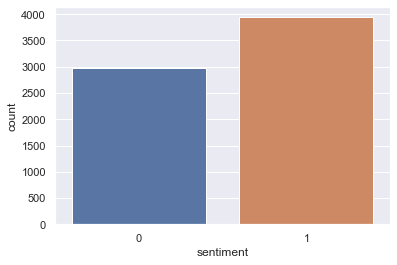

In [8]:
sns.countplot(x='sentiment', data=train_ds)
plt.show()

### It's balance dataset

## Bag of Words - count vector model

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
feature_vector = count_vectorizer.fit(train_ds.text)

In [10]:
feature_vector

CountVectorizer()

In [11]:
features = feature_vector.get_feature_names_out()
print("Total number of features :", len(features))
print("*************"*10)
print(features)

Total number of features : 2132
**********************************************************************************************************************************
['00' '007' '10' ... 'zach' 'zen' 'µª']


In [12]:
import random
np.random.seed(20)

In [13]:
train_ds_features = count_vectorizer.transform(train_ds.text)
train_ds_features

<6918x2132 sparse matrix of type '<class 'numpy.int64'>'
	with 65398 stored elements in Compressed Sparse Row format>

In [14]:
train_ds_df = pd.DataFrame(train_ds_features.toarray())

In [15]:
train_ds_df

,0,1,2,3,4,5,6,7,8,9,...,2122,2123,2124,2125,2126,2127,2128,2129,2130,2131
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6913,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
train_ds_df.columns = features

In [17]:
train_ds_df.columns

Index(['00', '007', '10', '10pm', '12', '16', '17', '1984', '1st', '200',
       ...
       'yip', 'you', 'young', 'younger', 'your', 'yuck', 'yuh', 'zach', 'zen',
       'µª'],
      dtype='object', length=2132)

In [18]:
train_ds_df.head()

,00,007,10,10pm,12,16,17,1984,1st,200,...,yip,you,young,younger,your,yuck,yuh,zach,zen,µª
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
train_ds[0:1]

,sentiment,text
0,1,The Da Vinci Code book is just awesome.


In [20]:
train_ds_df.iloc[0:1,150:157]

,away,awesome,awesomely,awesomeness,awesomest,awful,awkward
0,0,1,0,0,0,0,0


### Remove low frequency words

In [21]:
features_count = np.sum(train_ds_features.toarray(), axis=0)
features_count

array([ 1,  1,  4, ...,  1, 80,  1], dtype=int64)

In [22]:
feature_count_df = pd.DataFrame(dict(features=features, counts=features_count))

In [23]:
feature_count_df

,features,counts
0,00,1
1,007,1
2,10,4
3,10pm,1
4,12,1
...,...,...
2127,yuck,1
2128,yuh,1
2129,zach,1
2130,zen,80


Text(0, 0.5, 'Density of Words')

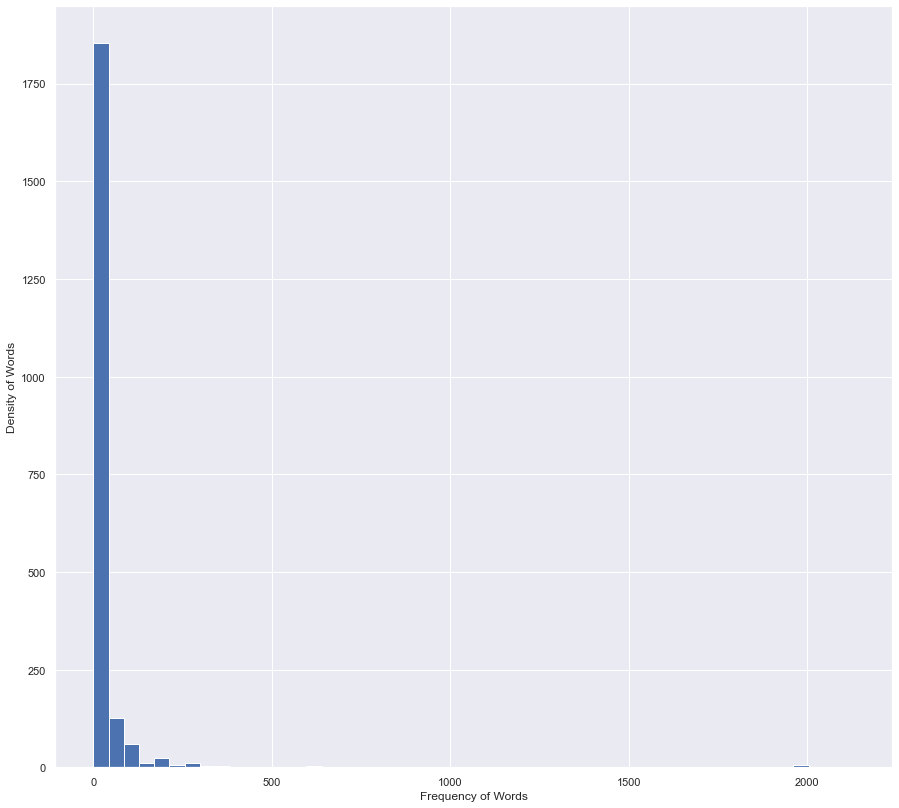

In [24]:
plt.figure(figsize=(15,14))
plt.hist(feature_count_df.counts, bins = 50, range=(0,2132))
plt.xlabel("Frequency of Words")
plt.ylabel("Density of Words")

# Bag of Words

In [25]:
count_vectorizer = CountVectorizer(max_features=1000)
feature_vector = count_vectorizer.fit(train_ds.text)
features = feature_vector.get_feature_names_out()
train_ds_features = count_vectorizer.transform(train_ds.text)
features_count = np.sum(train_ds_features.toarray(), axis=0)
feature_count_df = pd.DataFrame(dict(features=features, counts=features_count))

In [26]:
feature_count_df

,features,counts
0,10,4
1,17,3
2,33,2
3,6th,3
4,aaron,2
...,...,...
995,yesterday,2
996,yet,8
997,you,331
998,your,9


### Remove stop words

In [27]:
from sklearn.feature_extraction import text
my_stop_words = text.ENGLISH_STOP_WORDS
len(my_stop_words)

318

In [28]:
my_stop_words

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

### We are not applying stopwords because of negative sentence become positive

In [29]:
feature_count_df.sort_values('counts', ascending=False)[0:25]

,features,counts
866,the,3306
37,and,2154
358,harry,2093
675,potter,2093
138,code,2002
934,vinci,2001
178,da,2001
528,mountain,2000
104,brokeback,2000
488,love,1624


In [30]:
my_stop_words = text.ENGLISH_STOP_WORDS.union(['harry','potter','movie','10','17','33','6th'])

In [31]:
train_ds_df = pd.DataFrame(train_ds_features.todense())
train_ds_df.columns = features
train_ds_df['sentiment'] = train_ds.sentiment
train_ds_df

,10,17,33,6th,aaron,able,about,absolutely,absurd,academy,...,yea,yeah,year,yes,yesterday,yet,you,your,zen,sentiment
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6913,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Machine Learning concept

### Split the data into training and test

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_ds_features,train_ds.sentiment,
                                                   test_size=0.3, random_state=123)

In [33]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(4842, 1000) (2076, 1000) (4842,) (2076,)


### Naive Bayes Theorem

In [34]:
from sklearn.naive_bayes import BernoulliNB
nb_clf = BernoulliNB()
nb_clf.fit(x_train.toarray(), y_train)

BernoulliNB()

In [35]:
y_pred_train = nb_clf.predict(x_train.toarray())
y_pred_test = nb_clf.predict(x_test.toarray())

### Evaluate the model

In [36]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

### Confusion Matrix

In [37]:
print("Confusion Matrix of train data")

print(confusion_matrix(y_train, y_pred_train))

print("**************"*10)

print("Confusion Matrix of test data")
print(confusion_matrix(y_test, y_pred_test))

Confusion Matrix of train data
[[2042   47]
 [  22 2731]]
********************************************************************************************************************************************
Confusion Matrix of test data
[[ 860   26]
 [  16 1174]]


### Classification Report

In [38]:
print("Classification report of train data")
print('\n')
print(classification_report(y_train, y_pred_train))

print("**************"*10)

print("Classification report of test data")
print('\n')
print(classification_report(y_test, y_pred_test))

Classification report of train data


              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2089
           1       0.98      0.99      0.99      2753

    accuracy                           0.99      4842
   macro avg       0.99      0.98      0.99      4842
weighted avg       0.99      0.99      0.99      4842

********************************************************************************************************************************************
Classification report of test data


              precision    recall  f1-score   support

           0       0.98      0.97      0.98       886
           1       0.98      0.99      0.98      1190

    accuracy                           0.98      2076
   macro avg       0.98      0.98      0.98      2076
weighted avg       0.98      0.98      0.98      2076



### Accuracy 

In [39]:
print("Train accuracy",accuracy_score(y_train, y_pred_train))

print("**************"*10)

print("Test accuracy",accuracy_score(y_test, y_pred_test))

Train accuracy 0.9857496902106567
********************************************************************************************************************************************
Test accuracy 0.9797687861271677


### Support Vector Classifier

In [40]:
from sklearn.svm import SVC

In [41]:
svm=SVC(kernel="linear",gamma=.5,C=1.0)
svm.fit(x_train,y_train)

SVC(gamma=0.5, kernel='linear')

In [42]:
y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)

### Confusion Matrix

In [43]:
print("Confusion Matrix of train data")

print(confusion_matrix(y_train, y_pred_train))

print("**************"*10)

print("Confusion Matrix of test data")
print(confusion_matrix(y_test, y_pred_test))

Confusion Matrix of train data
[[2088    1]
 [   0 2753]]
********************************************************************************************************************************************
Confusion Matrix of test data
[[ 879    7]
 [   3 1187]]


### Classification Report

In [44]:
print("Classification report of train data")
print('\n')
print(classification_report(y_train, y_pred_train))

print("**************"*10)

print("Classification report of test data")
print('\n')
print(classification_report(y_test, y_pred_test))

Classification report of train data


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2089
           1       1.00      1.00      1.00      2753

    accuracy                           1.00      4842
   macro avg       1.00      1.00      1.00      4842
weighted avg       1.00      1.00      1.00      4842

********************************************************************************************************************************************
Classification report of test data


              precision    recall  f1-score   support

           0       1.00      0.99      0.99       886
           1       0.99      1.00      1.00      1190

    accuracy                           1.00      2076
   macro avg       1.00      0.99      1.00      2076
weighted avg       1.00      1.00      1.00      2076



### Accuracy

In [45]:
print("Train accuracy",accuracy_score(y_train, y_pred_train))

print("**************"*10)

print("Test accuracy",accuracy_score(y_test, y_pred_test))

Train accuracy 0.9997934737711689
********************************************************************************************************************************************
Test accuracy 0.9951830443159922


## Using Tf-IDF 

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
feature_vector = tfidf.fit(train_ds.text)

In [47]:
feature_vector

TfidfVectorizer()

In [48]:
features = feature_vector.get_feature_names_out()
print("Total number of features :", len(features))
print("*************"*10)
print(features)

Total number of features : 2132
**********************************************************************************************************************************
['00' '007' '10' ... 'zach' 'zen' 'µª']


### Split the data into training and test

In [49]:
x_train, x_test, y_train, y_test = train_test_split(train_ds.text,train_ds.sentiment,
                                                   test_size=0.3, random_state=123)

In [50]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(4842,) (2076,) (4842,) (2076,)


### Build Classification Model

In [51]:
from sklearn.ensemble import RandomForestClassifier

### Pipeline 

In [52]:
from sklearn.pipeline import Pipeline

In [53]:
RandomForestClassifier()

RandomForestClassifier()

In [54]:
classifier = Pipeline([('tfidf', TfidfVectorizer()), ('RandomForest', RandomForestClassifier())])

In [55]:
classifier.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('RandomForest', RandomForestClassifier())])

In [56]:
y_pred_train = classifier.predict(x_train)
y_pred_test = classifier.predict(x_test)

### Confusion Matrix

In [57]:
print("Confusion Matrix of train data")

print(confusion_matrix(y_train, y_pred_train))

print("**************"*10)

print("Confusion Matrix of test data")
print(confusion_matrix(y_test, y_pred_test))

Confusion Matrix of train data
[[2089    0]
 [   0 2753]]
********************************************************************************************************************************************
Confusion Matrix of test data
[[ 874   12]
 [   7 1183]]


### Classification Report

In [58]:
print("Classification report of train data")
print('\n')
print(classification_report(y_train, y_pred_train))

print("**************"*10)

print("Classification report of test data")
print('\n')
print(classification_report(y_test, y_pred_test))

Classification report of train data


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2089
           1       1.00      1.00      1.00      2753

    accuracy                           1.00      4842
   macro avg       1.00      1.00      1.00      4842
weighted avg       1.00      1.00      1.00      4842

********************************************************************************************************************************************
Classification report of test data


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       886
           1       0.99      0.99      0.99      1190

    accuracy                           0.99      2076
   macro avg       0.99      0.99      0.99      2076
weighted avg       0.99      0.99      0.99      2076



### Accuracy of train and test

In [59]:
print("Train accuracy",accuracy_score(y_train, y_pred_train))

print("**************"*10)

print("Test accuracy",accuracy_score(y_test, y_pred_test))

Train accuracy 1.0
********************************************************************************************************************************************
Test accuracy 0.9908477842003853


In [60]:
y_train, y_pred_train

(5019    0
 5866    0
 1519    1
 2176    1
 5917    0
        ..
 5218    0
 4060    0
 1346    1
 3454    1
 3582    1
 Name: sentiment, Length: 4842, dtype: int64,
 array([0, 0, 1, ..., 1, 1, 1], dtype=int64))

### Check model performance

In [61]:
test1 = ["Hello, Hope you are doing well."]
test2 = ["Hi, You are not learning NLP with ML Concept"]
test3 = ["Congratulations, You do not won a lottery ticket worth $100 Millons ! To claim call @11111111111111111"]

In [62]:
print(classifier.predict(test1))

[1]


In [63]:
print(classifier.predict(test2))

[0]


In [64]:
print(classifier.predict(test3))

[0]


### Pick any other classification machine learning algorithm and try to use sentiment analysis